In [2]:
import os
import tarfile
import zipfile
import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join('.', 'datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
# fetch data from api as tgz
# extract it to local storage
def fetch_housing_data(housing_url, housing_path):
    os.makedirs(housing_path, exist_ok = True)
    zipfile_path = housing_path + '/housing.tgz'
    urllib.request.urlretrieve(housing_url, zipfile_path)
    zipfile_ref = tarfile.open(zipfile_path)
    zipfile_ref.extractall(path = housing_path)
    zipfile_ref.close()

In [5]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [6]:
import pandas as pd

# load data from csv to pandas
def load_housing_data(housing_path, housing_fn):
    csv_path = os.path.join(housing_path, housing_fn)
    return pd.read_csv(csv_path)

In [7]:
housing_data = load_housing_data(HOUSING_PATH, 'housing.csv')

In [8]:
housing_data.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936         66900.0             INLAND             1
-121.20    39.25     5.0                 906.0        144.0           376.0       141.0       4.3523         188200.0            INLAND             1
           38.67     26.0                1546.0       287.0           773.0       299.0       2.9803         115400.0            INLAND             1
           38.68     9.0                 2200.0       422.0           938.0       369.0       3.4896         143800.0            INLAND             1
           38.69     26.0                3077.0       607.0           1603.0      595.0       2.7174         137500.0            INLAND             1
                                                                                                         

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


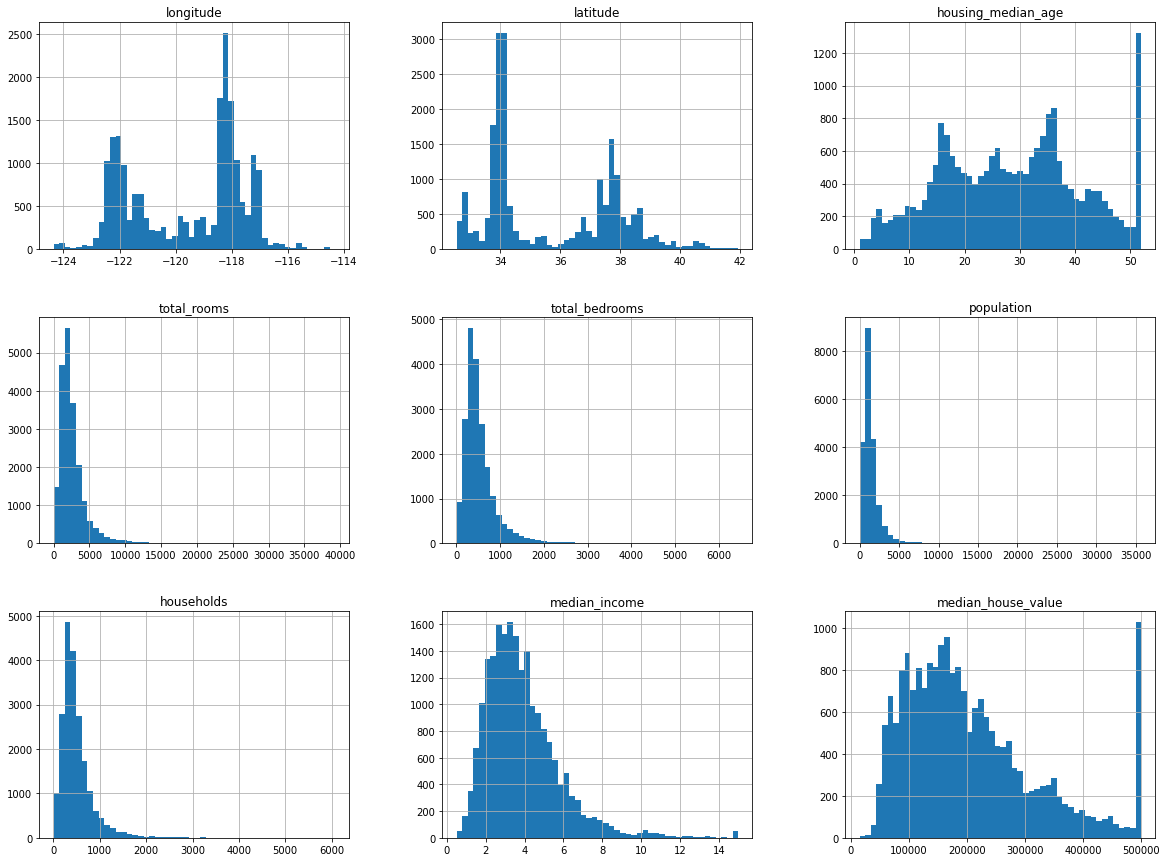

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_data.hist(figsize=(20, 15), bins=50)
plt.show()

In [11]:
# first method to split train test set
import numpy as np

def train_test_split(data, test_ratio):
    np.random.seed(43)
    
    len_data = len(data)
    perm = np.random.permutation(len_data)
    
    return data.iloc[perm[:int(len_data*(1-test_ratio))]], data.iloc[perm[int(len_data*(1-test_ratio)):]]

train_data, test_data = train_test_split(housing_data, 0.2)

print(train_data.shape)
print(test_data.shape)

print(f'first train data \n{train_data.iloc[0]}')
print(f'first test data \n{test_data.iloc[0]}')

(16512, 10)
(4128, 10)
first train data 
longitude               -118.19
latitude                  33.99
housing_median_age           36
total_rooms                1273
total_bedrooms              379
population                 1398
households                  353
median_income            2.4516
median_house_value       147800
ocean_proximity       <1H OCEAN
Name: 7310, dtype: object
first test data 
longitude                -118.17
latitude                   33.79
housing_median_age            30
total_rooms                 1349
total_bedrooms               519
population                  2646
households                   552
median_income             1.9318
median_house_value        115900
ocean_proximity       NEAR OCEAN
Name: 8209, dtype: object


In [12]:
# test method to split train test set
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))&0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_data.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

print(train_set.shape)
print(test_set.shape)

print(f'first train data \n{train_set.iloc[0:10]}')
print(f'first test data \n{test_set.iloc[0:10]}')

(16512, 11)
(4128, 11)
first train data 
    index  longitude  latitude  housing_median_age  total_rooms  \
0       0    -122.23     37.88                41.0        880.0   
1       1    -122.22     37.86                21.0       7099.0   
3       3    -122.25     37.85                52.0       1274.0   
4       4    -122.25     37.85                52.0       1627.0   
6       6    -122.25     37.84                52.0       2535.0   
7       7    -122.25     37.84                52.0       3104.0   
8       8    -122.26     37.84                42.0       2555.0   
9       9    -122.25     37.84                52.0       3549.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   

    total_bedrooms  population  households  median_income  median_house_value  \
0            129.0       322.0       126.0         8.3252            452600.0   
1           1106.0      2401.0      1138.0         8.3014  

In [13]:
# third method for split train test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing_with_id, 
    test_size = 0.2,
    random_state = 43)

print(train_set.shape)
print(test_set.shape)

print(f'first train data \n{train_set.iloc[0]}')
print(f'first test data \n{test_set.iloc[0]}')

(16512, 11)
(4128, 11)
first train data 
index                       72
longitude              -122.29
latitude                 37.81
housing_median_age          49
total_rooms                844
total_bedrooms             204
population                 560
households                 152
median_income             1.75
median_house_value       75000
ocean_proximity       NEAR BAY
Name: 72, dtype: object
first test data 
index                      7310
longitude               -118.19
latitude                  33.99
housing_median_age           36
total_rooms                1273
total_bedrooms              379
population                 1398
households                  353
median_income            2.4516
median_house_value       147800
ocean_proximity       <1H OCEAN
Name: 7310, dtype: object


In [14]:
housing_data['income_cat'] = pd.cut(
    housing_data['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)

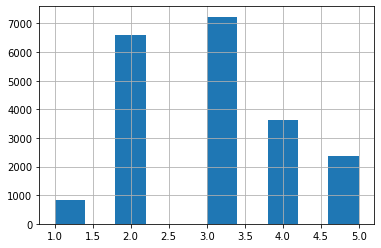

In [15]:
housing_data['income_cat'].hist()
plt.show()

In [16]:
print(housing_data['income_cat'].value_counts()/len(housing_data))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
splitted = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [19]:
for train_index, test_index in splitted.split(housing_data, housing_data['income_cat']):
#     print(train_index)
    stra_train = housing_data.iloc[train_index]
    stra_test = housing_data.iloc[test_index]

In [20]:
# stra distribution
stra_train['income_cat'].value_counts()/len(stra_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [21]:
# orig distribution
housing_data['income_cat'].value_counts()/len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [22]:
train_set, test_set = train_test_split(
    housing_data, 
    test_size = 0.2,
    random_state = 43)

In [23]:
# split with out strat distribution
train_set['income_cat'].value_counts()/len(train_set)

3    0.351381
2    0.319828
4    0.175630
5    0.113372
1    0.039789
Name: income_cat, dtype: float64

## There is no significant the distribution of strat and normal random

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

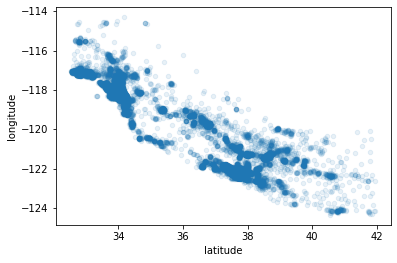

In [24]:
train_set.plot(kind='scatter', x='latitude', y = 'longitude', alpha = 0.1)

In [ ]:
%matplotlib inline
train_set.plot(
    kind = 'scatter', 
    x = 'latitude', 
    y='longitude', 
    s = train_set['population']/50,
    label = 'population',
    alpha = 0.1, 
    cmap=plt.get_cmap("jet"),
    c = train_set['median_house_value'],
    figsize = (10, 6),
    colorbar=True)
plt.legend()

In [ ]:
train_set.corr()

## Scatter matrix

from pandas.plotting import scatter_matrix

focused_attributes = ['median_house_value', 'longitude', 'latitude', 'housing_median_age', 'median_income']
scatter_matrix(train_set[focused_attributes], figsize=(12, 8))

In [ ]:
 train_set.info()

In [ ]:
mod_train_set = train_set.copy()
mod_train_set['total_rooms_per_household'] = train_set['total_rooms']/train_set['households']
mod_train_set['total_bedrooms_per_rooms'] = train_set['total_bedrooms']/train_set['total_rooms']

In [ ]:
attributes = focused_attributes + ['total_rooms_per_household', 'total_bedrooms_per_rooms']
scatter_matrix(mod_train_set[attributes], figsize=(12, 8))

In [ ]:
corr_matrix = mod_train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
corr_matrix

## finish data visualization, it's time to begin data cleaning!

In [ ]:
housing = housing_data.drop(columns=['median_house_value'])
housing.info()

In [ ]:
housing_label = housing_data[['median_house_value']]

In [ ]:
housing_label.info()

In [ ]:
print(housing_label is housing_data[['median_house_value']])

In [ ]:
## data cleaning function
housing.loc[housing['total_bedrooms'].isna()]

In [ ]:
## simple class imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [ ]:
housing_label = train_set['median_house_value']
housing = train_set.drop(columns=['median_house_value'])
housing_num = train_set.drop(columns=['ocean_proximity', 'median_house_value'])

imputer.fit(housing_num)

In [ ]:
X = imputer.fit_transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)#, index = housing_num.index)

In [ ]:
housing_tr.info()

In [ ]:
## encode categorical feature using ordinal and one hot encoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
housing_cat = train_set[['ocean_proximity']]

In [ ]:
ord_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder()

In [ ]:
ord_encoder.fit(housing_cat)
oh_encoder.fit(housing_cat)
housing_ord = ord_encoder.transform(housing_cat)
housing_oh = oh_encoder.transform(housing_cat)

In [ ]:
print(housing_oh.shape)
print(housing_ord.shape)

## Create custom transformer using sklearn.base

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
tot_bedrooms_idx = 4
tot_rooms_idx = 3

class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self # do no thing
    
    def transform(self, X):
        
        bedrooms_per_room = X[:, tot_bedrooms_idx]/X[:, tot_rooms_idx]
        X_numpy = np.c_[X, bedrooms_per_room]
        
        return X_numpy

In [ ]:
my_transformer = MyTransformer()

X = my_transformer.fit_transform(housing_num.to_numpy())

In [ ]:
housing_data.info()

## Introduction to Pipeline and ColumnTransformer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# normally, the category feature and number feature have to be dealt with seperately
# but for the sklearn after version 0.2, the columntransformer is introduced and can deal with this problem

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_combine', MyTransformer()),
    ('standardization', MinMaxScaler())
])

num_pipeline.fit(housing_num)

In [ ]:
sample = num_pipeline.transform(housing_num)

In [ ]:
for i in range(sample.shape[1]):
    print(f'mean : {sample[:, i].mean()} std : {sample[:, i].std()}')

In [ ]:
## using ColumnTransformer to both transform num and cat value
num_col_names = housing_num.columns
cat_col_names = housing_cat.columns

print(num_col_names)
print(cat_col_names)

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_col_names),
    ('cat_pipeline', OneHotEncoder(), cat_col_names)
])

In [ ]:
housing.info()

In [ ]:
full_pipeline.fit(housing)

In [ ]:
X = full_pipeline.transform(housing)
print(X.shape)

## It's time to implement ml model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [ ]:
# forecast using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, housing_label)

In [ ]:
print(f'mse : {np.sqrt(mean_squared_error(housing_label, lin_reg.predict(X)))}')
print(f'mae : {mean_absolute_error(housing_label, lin_reg.predict(X))}')

In [ ]:
# using decision tree
tree = DecisionTreeRegressor()
tree.fit(X, housing_label)

In [ ]:
print(f'mse : {np.sqrt(mean_squared_error(housing_label, tree.predict(X)))}')
print(f'mae : {mean_absolute_error(housing_label, tree.predict(X))}')

In [ ]:
# implement cross validation to obeserve the overfitting
def cv_scores(model, X, y, cv, scoring, save = True, 
              save_loc = './saved_model/house-pricing-analysis', 
              model_name = 'mymodel'):
    import joblib
    import os
    
    history = cross_val_score(model, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error')

    os.makedirs(save_loc, exist_ok = True)
    # save model
    joblib.dump(model, save_loc + '/' + model_name)
    # save history
    joblib.dump(history, save_loc + '/' + model_name + '_results')
    
    print(f'all scores : {np.sqrt(-history)}')
    print(f'mean : {np.sqrt(-history).mean()}')
    print(f'std : {np.sqrt(-history).std()}')

In [ ]:
save_loc = './saved_model/house-pricing-analysis'
model_name = 'decision-tree'
cv_scores(tree, X, y=housing_label, cv = 10, 
          scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

In [ ]:
model_name = 'linear-regression'
cv_scores(lin_reg, X, y=housing_label, cv = 10, 
          scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

In [ ]:
svr = SVR(kernel='linear')
cv_scores(svr, X, y=housing_label, cv = 10, 
          scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

In [ ]:
# load model test
import joblib
import os

model = joblib.load(os.path.join(save_loc, 'linear-regression'))
history = joblib.load(os.path.join(save_loc, 'linear-regression_results'))

# random forest
forest = RandomForestRegressor()

model_name = 'random-forest'
cv_scores(forest, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name

svr = SVR()

model_name = 'support-vector-regressor'
cv_scores(svr, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

mlp = MLPRegressor(hidden_layer_sizes=[5,5], solver = 'lbfgs')

model_name = 'neural-network'
cv_scores(mlp, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

## Fine tune the model using grid search and randomized search

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# distributions = {
#     'splitter': ['best', 'random'],
#     'max_depth':randint(2, 50),
#     'max_leaf_nodes': [None, randint(2,50)]
# }

# rcv = RandomizedSearchCV(DecisionTreeRegressor(), distributions, cv = 5, n_iter = 50, random_state=8)

In [ ]:
grid_params = {'splitter':['best', 'random'], 
               'max_depth' : [5, 10, 15], 
               'max_features' : [None, 'log2'], 
               'max_leaf_nodes':[None, 5, 10]}

gcv = GridSearchCV(DecisionTreeRegressor(), grid_params, cv = 5, scoring='neg_mean_squared_error')

In [ ]:
gcv.fit(X, housing_label)

In [ ]:
np.sqrt(-gcv.best_score_)

In [ ]:
for mean_score, param in zip(gcv.cv_results_['mean_test_score'], gcv.cv_results_['params']):
    print(f'{np.sqrt(-mean_score)} {param}')

## Observe feature importances

In [ ]:
gcv.best_estimator_.feature_importances_.shape
feature_importances = gcv.best_estimator_.feature_importances_

In [ ]:
print(num_col_names)
extra_col_names = ['num_bedrooms_per_room']
print(cat_col_names)
full_cat_col_names = full_pipeline.named_transformers_['cat_pipeline'].categories_

In [ ]:
print(list(full_cat_col_names[0]))

In [ ]:
all_features = list(num_col_names)+extra_col_names+list(full_cat_col_names[0])

feature_w_importances = zip(feature_importances, all_features)
feature_w_importances = list(sorted(feature_w_importances, reverse = True))
print(feature_w_importances)

## evaluate system on the test set

In [ ]:
test_set.info()

In [ ]:
test_label = test_set['median_house_value']
test_data = test_set.drop(columns=['median_house_value'])

In [ ]:
X_test = full_pipeline.transform(test_data)

In [ ]:
print(f' mae : {mean_absolute_error(test_label, gcv.best_estimator_.predict(X_test))}')
print(f' mae : {np.sqrt(mean_squared_error(test_label, gcv.best_estimator_.predict(X_test)))}')

## find the confidence interval of test score using t-distributions vs normal-distribution

In [ ]:
import scipy.stats

In [ ]:
print(rse.shape)

In [ ]:
confidence = 0.95
rse = np.power(test_label - gcv.best_estimator_.predict(X_test),2)
mean = rse.mean()
std = rse.std()
sem = scipy.stats.sem(rse)
print(f'{mean: ,.2f}')
print(f'{std:,.2f}')
print(f'{sem:,.2f}')

t_interval = np.sqrt(scipy.stats.t.interval(confidence, len(rse) - 1, mean, sem))
print(t_interval)

## integrate feature selection on data pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelectionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
    
    def fit(self, X, y = None):
        return self # do no thing
    
    def transform(self, X, y = None):
        new_X = X[:, self.selected_features]
        return new_X

In [ ]:
num_selected = 5
selected_feature_idx = []

print(feature_w_importances[0][1])
print(all_features.index('median_income'))

for i in range(num_selected):
    feature = feature_w_importances[i][1]
    selected_feature_idx.append(all_features.index(feature))
    
print(selected_feature_idx)

In [ ]:
feature_selector = FeatureSelectionTransformer(selected_feature_idx)
new_X = feature_selector.fit_transform(X)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_combine', MyTransformer()),
    ('scaler', MinMaxScaler())
])

composed_pipe = ColumnTransformer([
    ('num_pipe', num_pipeline, num_col_names),
    ('cat_pipe', OneHotEncoder(), cat_col_names)
])

full_pipe = Pipeline([
    ('composed_pipe', composed_pipe),
    ('feature_selector', feature_selector)
])

In [ ]:
housing.info()

In [ ]:
X_prep = full_pipe.fit_transform(housing)

In [ ]:
print(X_prep.shape)

## Fine tune model again and compare with the old model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
lin_reg = LinearRegression()
tree = DecisionTreeRegressor()

In [ ]:
history_lin = cross_val_score(lin_reg, X_prep, housing_label, cv = 10, scoring = 'neg_mean_squared_error')
history_tree = cross_val_score(tree, X_prep, housing_label, cv = 10, scoring = 'neg_mean_squared_error')

In [ ]:
print(f'mean linear model : {np.sqrt(-history_lin).mean()}')
print(f'mean decision tree : {np.sqrt(-history_tree).mean()}')

## perform grid search again to finetune decision tree model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_params = {'max_depth':[1, 10, 15, 20], 'max_features': [None,1,3,5], 'max_leaf_nodes':[None, 3, 5, 7]}

gcv_tree = GridSearchCV(DecisionTreeRegressor(), tree_params, cv = 10, scoring='neg_mean_squared_error')

In [ ]:
gcv_tree.fit(X_prep, housing_label)

In [ ]:
gcv_tree.cv_results_['params']

In [ ]:
for rmse, estimator in zip(np.sqrt(-gcv_tree.cv_results_['mean_test_score']), gcv_tree.cv_results_['params']):
    print((rmse, estimator))

In [ ]:
print(gcv_tree.best_estimator_)
print(np.sqrt(-gcv_tree.best_score_))

## Integrate preprocessing pipe line with gridsearch cv!

In [ ]:
full_function_pipe = Pipeline([
    ('preprocess_pipe', full_pipe),
    ('estimator', gcv_tree)
])

In [ ]:
full_function_pipe.fit(housing, housing_label)

In [ ]:
full_function_pipe.named_steps['estimator'].best_estimator_.predict(X_prep[:5])

In [ ]:
full_function_pipe.predict(housing[:5])

In [ ]:
rmse = np.sqrt(-full_function_pipe.named_steps['estimator'].best_score_)

print(f'rmse : {rmse}')

In [ ]:
## test on test set
pred = full_function_pipe.predict(test_data)

rmse = np.sqrt(mean_squared_error(test_label, pred))
print(f'test rmse : {rmse:,.2f}')

In [ ]:
# find the confidence interval using t distribution
import scipy.stats

In [ ]:
degree = len(pred) - 1
confidence = 0.99
se = np.power(test_label - pred, 2)
mse = se.mean()
sem = scipy.stats.sem(se)

In [ ]:
print(np.sqrt(scipy.stats.t.interval(confidence, degree, mse, sem)))